In [2]:
# Written by Alex DeCaria for submission to the John Hunter Excellence in 
# Plotting contest at SciPy 2014.

import os
os.environ["PROJ_LIB"] = "C:\\Users\\joery\\Anaconda3\\envs\\tf\\Library\\share"


from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import scipy.special as sp

C:\Users\joery\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


0 0
1 -1
1 0
1 1


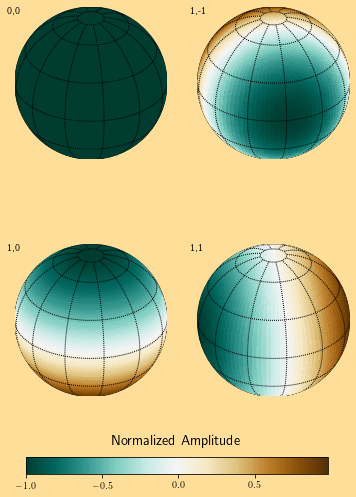

In [95]:
''' Generates a sampling of spherical harmonics for illustration of
    their properties'''

# A collection of indices (order, degree) for the spherical harmonics
indices = ((0, 0), (1, -1), (1, 0), (1, 1))  #(0,1),(0,2),(0,3),(1,1),(1,2),(1,3), (2,2),(2,3),(3,6),(4,5),(5,7),(6,10))

#Setup figure and plot parameters
pcolor = True # If True, plots pcolor image instead of filled contour
cmap = cm.get_cmap('BrBG_r') # Set color map
figure, ax = plt.subplots(2, 2)
figure.set_size_inches(6, 8)
figure.set_facecolor('#ffde99')

# Create latitude and longitude arrays
lon = np.linspace(0,2*np.pi,100)
lat = np.linspace(-np.pi/2,np.pi/2,100)
colat = lat+np.pi/2 # colatitude array

# Generate 2-D lat/lon grids
lon_grid, lat_grid = np.meshgrid(lon, lat)
theta, phi = np.meshgrid(colat, lon)

for i, a in enumerate(ax.flat):
    # set up orthographic map projection
    mp = Basemap(projection='ortho', lat_0 = 30, lon_0 = -100, ax=a)
    # draw the edge of the map projection region (the projection limb)
    mp.drawmapboundary()
    # draw lat/lon grid lines every 30 degrees.
    mp.drawmeridians(np.arange(0, 360, 30))
    mp.drawparallels(np.arange(-90, 90, 30))
    
    # Generate spherical harmonic data
    ell, m_ell = indices[i]
    c, l = np.meshgrid(colat, lon)
    Y = sp.sph_harm(abs(m_ell), ell, phi, theta)
    # Linear combination of Y_l,m and Y_l,-m to create the real form.
    if m_ell < 0:
        Y = np.sqrt(2) * (-1)**m_ell * Y.imag
    elif m_ell > 0:
        Y = np.sqrt(2) * (-1)**m_ell * Y.real
 
    d = Y
    print(ell, m_ell)
    # Create normalized data for real component
    drm = np.round(np.real(d)/np.max(np.real(d)), 2)
    
    # Create projection coordinates
    x, y = mp(np.degrees(lon_grid), np.degrees(lat_grid))

    #Plot 
    if pcolor:
        CS = mp.pcolor(x,y,np.transpose(drm),cmap=cmap)
    else:
        CS = mp.contourf(x,y,np.transpose(drm),20,cmap=cmap)
    a.annotate('{0:d},{1:d}'.format(ell,m_ell),(-0.05,0.95),xycoords = 'axes fraction')

    
    
    
# Create and plot colorbar
cax = figure.add_axes([0.15,0.03,0.7,0.03])
cb = plt.colorbar(CS, cax=cax,ticks = np.linspace(-1.0, 1.0, 5),
                  orientation = 'horizontal')
cax.set_xlabel('Normalized Amplitude',size = 'x-large', labelpad = -55)

plt.show()

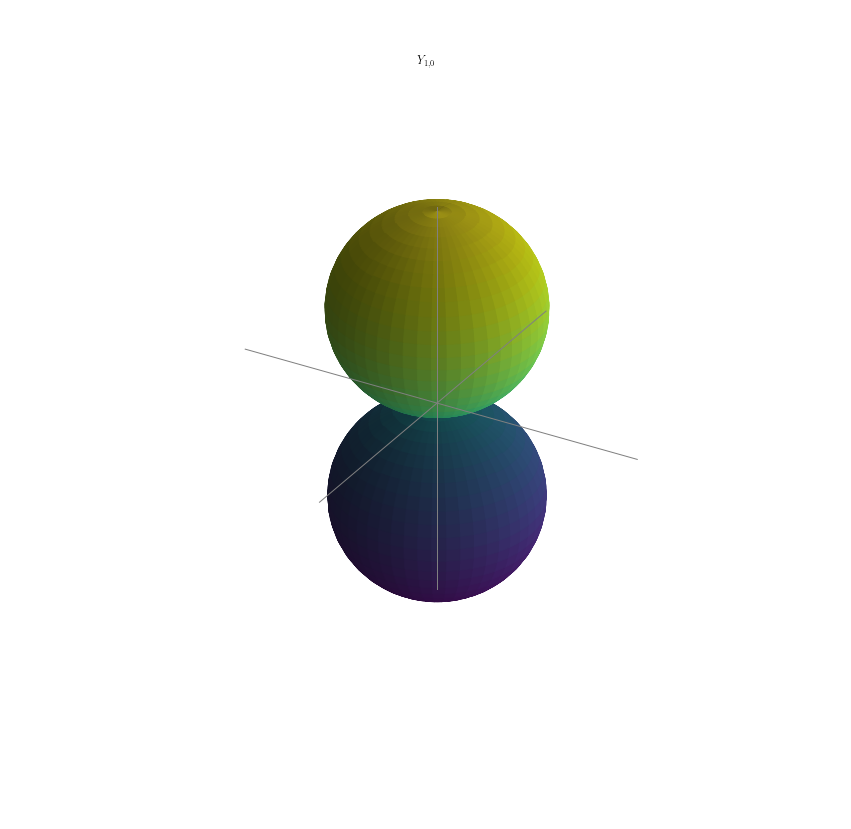

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# The following import configures Matplotlib for 3D plotting.
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
plt.rc('text', usetex=True)

# Grids of polar and azimuthal angles
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
# Create a 2-D meshgrid of (theta, phi) angles.
theta, phi = np.meshgrid(theta, phi)
# Calculate the Cartesian coordinates of each point in the mesh.
xyz = np.array([np.sin(theta) * np.sin(phi),
                np.sin(theta) * np.cos(phi),
                np.cos(theta)])

def plot_Y(ax, el, m):
    """Plot the spherical harmonic of degree el and order m on Axes ax."""
    
    # NB In SciPy's sph_harm function the azimuthal coordinate, theta,
    # comes before the polar coordinate, phi.
    Y = sph_harm(abs(m), el, phi, theta)

    # Linear combination of Y_l,m and Y_l,-m to create the real form.
    if m < 0:
        Y = np.sqrt(2) * (-1)**m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1)**m * Y.real
        
    Yx, Yy, Yz = np.abs(Y) * xyz

    # Colour the plotted surface according to the sign of Y.
    cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap())
    cmap.set_clim(-0.5, 0.5)
    
    ax.plot_surface(Yx, Yy, Yz,
                    facecolors=cmap.to_rgba(Y.real),
                    rstride=2, cstride=2)

    # Draw a set of x, y, z axes for reference.
    ax_lim = 0.5
    ax.plot([-ax_lim, ax_lim], [0,0], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [-ax_lim, ax_lim], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [0,0], [-ax_lim, ax_lim], c='0.5', lw=1, zorder=10)
    
    # Set the Axes limits and title, turn off the Axes frame.
    ax.set_title(r'$Y_{{{},{}}}$'.format(el, m))
    ax_lim = 0.5
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    ax.axis('off')

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
l, m = 1, 0
plot_Y(ax, l, m)
plt.show()

In [30]:
np.real(4 + 1j)

4.0

0 0
1 -1
1 0
1 1


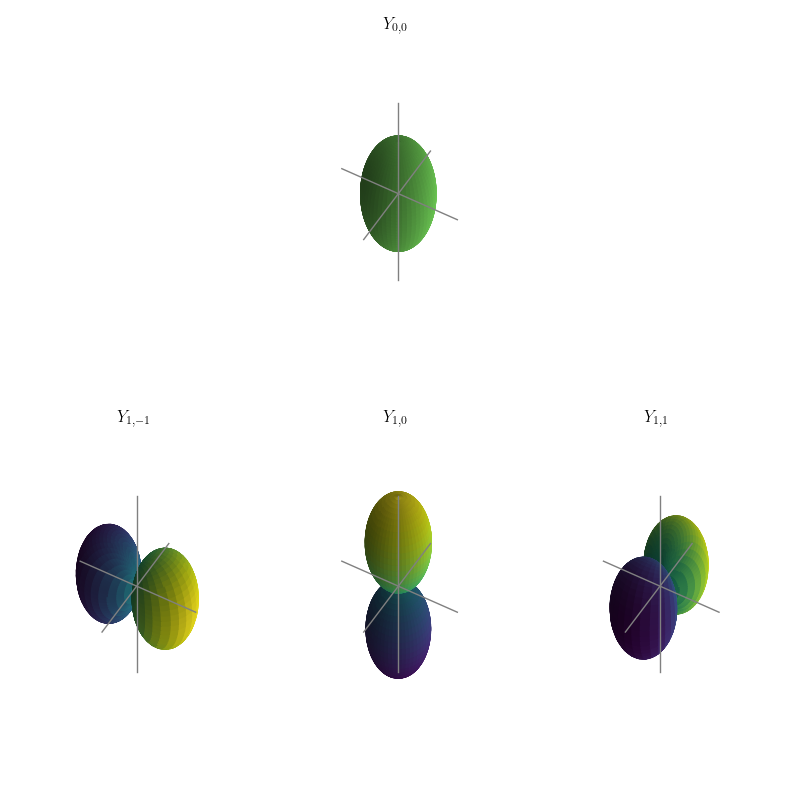

In [81]:
el_max = 1
figsize_px, DPI = 800, 100
figsize_in = figsize_px / DPI
fig = plt.figure(figsize=(figsize_in, figsize_in), dpi=DPI)
spec = gridspec.GridSpec(ncols=2*el_max+1, nrows=el_max+1, figure=fig)
for el in range(el_max+1):
    for m_el in range(-el, el+1):
        print(el, m_el)
        ax = fig.add_subplot(spec[el, m_el+el_max], projection='3d')
        plot_Y(ax, el, m_el)
plt.tight_layout()
plt.show()

In [ ]:
def get_element(self, l, m, theta, phi):
    """Tesseral spherical harmonic with Condon-Shortley phase.
    The Tesseral spherical harmonics are also known as the real spherical
    harmonics.
    Args:
        l: int for degree
        m: int for order, where -l <= m < l
        theta: collatitude or polar angle
        phi: longitude or azimuth
    Returns:
        tensor of shape theta
    """
    assert abs(m) <= l, "absolute value of order m must be <= degree l"

    N = np.sqrt((2*l+1) / (4*np.pi))
    leg = self.lpmv(l, abs(m), torch.cos(theta))
    if m == 0:
        return N*leg
    elif m > 0:
        Y = torch.cos(m*phi) * leg
    else:
        Y = torch.sin(abs(m)*phi) * leg
    N *= np.sqrt(2. / pochhammer(l-abs(m)+1, 2*abs(m)))
    Y *= N
    return Y